In [ ]:
# # Copy dataset
# from google.colab import drive
# drive.mount('/content/drive')
# !mkdir /content/data
# !cp -R "/content/drive/MyDrive/Colab Notebooks/skin-cancer/data" /content

In [ ]:
# Load packages
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

In [ ]:
# Set seed from random number generator
np.random.seed(20)

# Exploratory Data Analysis

The dataset we are using was made available by the `International Skin Imaging Collaboration (ISIC)` during the *2017 ISIC Challenge on Skin Lesion Analysis Towards Melanoma Detection*. You can find all the data curated by the ISIC [here](https://challenge.isic-archive.com/data/).

We have downloaded the images and organized them in the following matter using the ground truth labels.

```
data
└───train
│   └───melanoma
│   └───nevus
│   └───seborrheic_keratosis 
└───valid
│   └───melanoma
│   └───nevus
│   └───seborrheic_keratosis
└───test
    └───melanoma
    └───nevus
    └───seborrheic_keratosis
```

In [ ]:
# Here we collect all the JPEG files contained in the /data directory

%%time
image_files = []
for file in glob("data/**", recursive=True):    
    if file.endswith('.jpg'):
        image_files.append(file)

CPU times: user 24.5 ms, sys: 13 ms, total: 37.5 ms
Wall time: 38.8 ms


In [ ]:
# Here we go through all the images and load them 

%%time
df = pd.DataFrame(columns=('Filename', 'Width', 'Height', 'Label'))
for i, path in enumerate(image_files):
    img = Image.open(path)
    label = path.split('/')[2]
    df.loc[i] = (path, img.width, img.height, label)
    
df.head()

CPU times: user 8.61 s, sys: 210 ms, total: 8.82 s
Wall time: 9.11 s


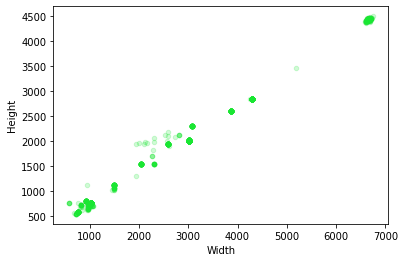

In [ ]:
# See how the dimensions are distributed

df.plot.scatter('Width', 'Height', color=(0.1, 0.9, 0.2, 0.2));

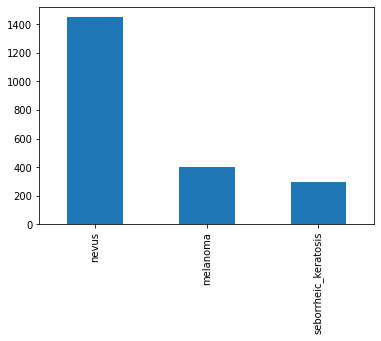

In [ ]:
# Class Distribution

df['Label'].value_counts().plot.bar();

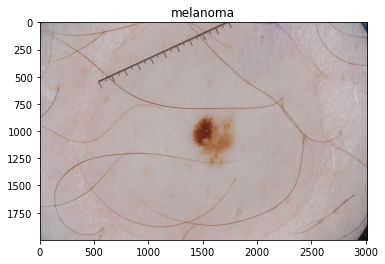

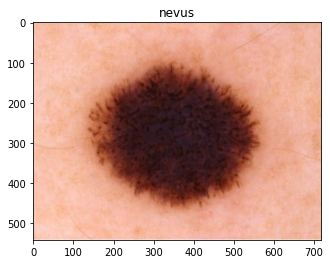

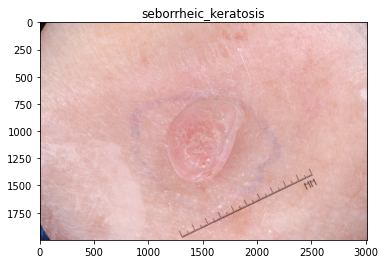

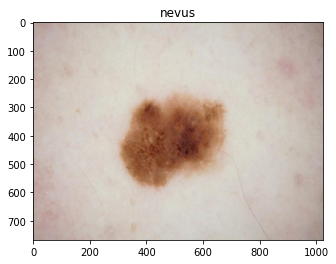

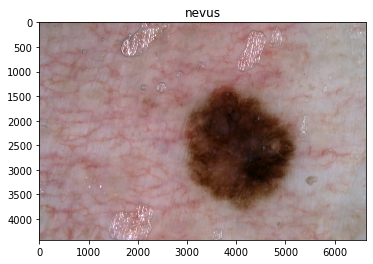

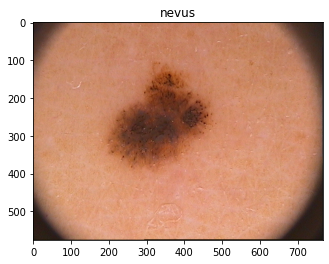

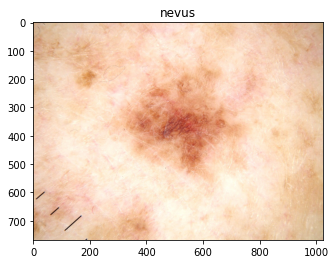

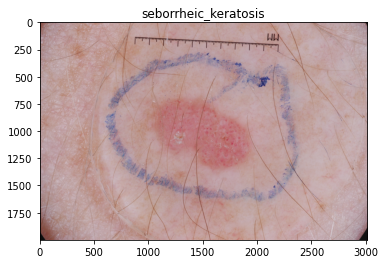

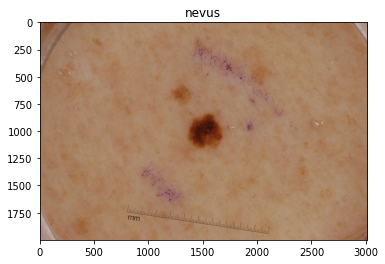

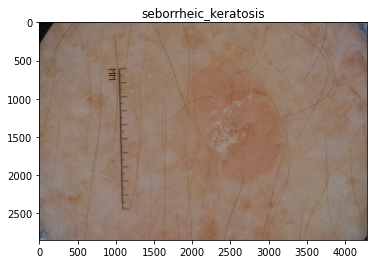

In [ ]:
# Print out some samples

for i in range(10):

    path = image_files[np.random.randint(0, len(image_files))]
    img = Image.open(path)
    label = path.split('/')[2]

    plt.figure()
    plt.title(label)
    plt.imshow(img)


> We can see that the suspicious lesions are centered in the field of view of the dermatoscope.  
> The images sometimes have dark corners.

We usually feed consistently sized images to artifical neural networks. In the current use case, we can resize and crop the images without losing crucial information.

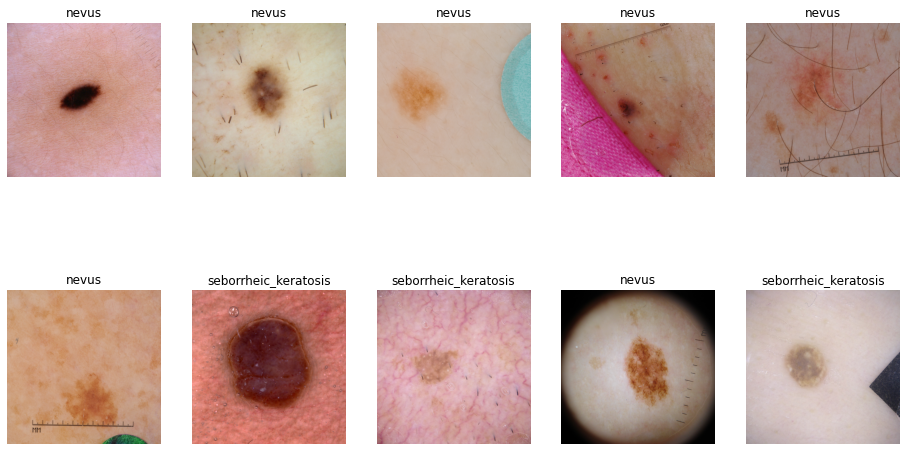

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(16, 9))

for ax in axes.flatten():
    path = image_files[np.random.randint(0, len(image_files))]
    img = Image.open(path)
    label = path.split('/')[2]

    width, height = img.size
    new_size = (int(width/height*1024), 1024)
    img_resized = img.resize(new_size)

    img_cropped = img_resized.crop(((img_resized.width-1024)//2, 0, (img_resized.width+1024)//2, 1024))

    ax.set_title(label)
    ax.axis('off')
    ax.imshow(img_cropped)
